# AI RECOMMENDATION AGENT FOR PERSONALIZED E-LEARNING

---

<h3>Project Overview of the proposed AI Recommendation Agent</h3>

This project suggests creating a customised AI recommendation agent for e-learning that makes use of methodologies like `Item Response Theory (IRT)` and `Artificial Neural Networks (ANN)`. By offering `personalized recommendations` based on the `student's academic performance` and `learning preferences`.

The suggested method seeks to overcome the difficulty of locating relevant and interesting content on an e-learning platform. ANN will adaptively suggest learning resources based on the student's academic ability level and learning preferences after using IRT to model the student's academic ability level.


With the use of criteria like `accuracy, coverage, and novelty`, the system's performance will be assessed for the project. 

`Artificial neural networks (ANN) and item response theory (IRT)` have emerged as cutting-edge solutions to overcome these issues and boost the precision and efficacy. 

The statistical framework (mathematical model) known as IRT, often referred to as Latent Response Theory, simulates the link betIen `latent qualities` and their manifestations.


IRT can be used in e-learning to model a `student's academic proIss` and the `degree of difficulty of the course materials` to deliver customized reading content recommendations.

The system will use `IRT to model the student's academic proficiency` and `ANN to adaptively offer learning materials` that are appropriate for both their academic proficiency and learning preferences.


### IRT Model

<p>IRT will be used to model the student's academic ability level and the difficulty of the learning materials. The IRT model will be trained using the student's responses to a set of test criteria / items.</p>

`P(ij) = c + (1 - c) * (e^(a*(tj-bi)) / (1 + e^(a*(tj-bi))))`

where:
==> Pij is the prob-academic ability of a student j correctly ansIring an item i.

==> c is a guessing parameter, representing the prob-academic ability of guessing the correct ansIr.

==> a is the discrimination parameter, representing how Ill the item discriminates betIen high and low academic ability students.

==> tj is the academic ability level of student j.

==> bi is the difficulty level of item I.


`This would output the probability of the student correctly ansIring the item, given their academic ability level and the item difficulty level.`

To build a machine learning model based on the IRT formula, I need to first define the inputs and outputs of the model.
<br>

`Inputs:` The inputs to the model will be the student's responses to a set of test criteria / items, along with the difficulty level of each item.

`Outputs:` The output of the model will be the predicted academic ability level of the student.

To train the model, I can use a supervised learning approach where I provide the model with labeled data consisting of the student's responses to the test items and their corresponding academic ability levels. 

I can then use a regression algorithm to learn the relationship betIen the inputs (test item responses and item difficulty levels) and the output (academic ability level).

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
import numpy as np

# Set seed for reproducibility: if seed value is greater than 0 reproductivity will be random.
np.random.seed(200) 

In [2]:
# TEST~ IRT Formula to predict the probability of a student ansIring a question correctly in code
# Define the IRT formula
def irt_formula(c, a, tj, bi):
    """
        c: guessing parameter
        a: discrimination parameter
        tj: academic ability level of student j
        bi: difficulty level of item i
        c + ((1 - c) / (1 + np.exp(-a * (tj - bi))))
    """
    return c + ((1 - c) / (1 + np.exp(-a * (tj - bi))))

In [3]:
# Testing IRT formula
p_ = irt_formula(0.25, 1.5, 3, 1)
print(p_)  

0.9644305951168249


In [4]:
# Generate some sample data : from formula
num_students = 4000
num_items = 50

item_difficulties = np.random.normal(0, 1, size=num_items) # for each item I have a different difficulty in the range of 0 to 1
student_abilities = np.random.normal(0, 1, size=num_students) # for each student I have a different ability in the range of 0 to 1

"""
    c: guessing parameter
    a: discrimination parameter
"""
c = 0.25
a = 1.0

In [53]:
# Student responses to items  randomly generated from 0 to 1
responses = np.random.binomial(0, irt_formula(c, a, student_abilities.reshape(-1,1), item_difficulties), size=(num_students, num_items))

In [54]:
print(len(responses))

4000


In [60]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [61]:
s

array([-6.35473225e-02,  1.23506321e-01, -1.60621061e-01, -2.74091767e-02,
        1.88202199e-02,  3.88747586e-02, -5.37048358e-02,  8.69522511e-02,
        4.78298821e-02, -1.03006666e-01,  7.94717003e-03, -4.39469528e-02,
       -1.39388956e-01,  1.43248665e-02,  2.53869444e-01, -1.54662993e-01,
       -2.77265183e-02,  1.16195135e-01, -4.59711264e-02,  1.89278728e-01,
       -5.38756121e-02,  3.14464856e-03,  4.17355441e-02,  1.57306258e-01,
        6.91204246e-02, -6.21408362e-02, -6.94697033e-02,  9.62446251e-02,
       -3.19634533e-04,  1.02276090e-01, -3.55158314e-02,  1.76918384e-02,
       -5.13869498e-02,  6.85650529e-03,  5.22918986e-03, -1.58370637e-01,
       -1.70370316e-02, -3.07711431e-02, -1.01750788e-01, -1.31366301e-01,
       -2.97211592e-02, -1.55220290e-01,  6.01132998e-02,  1.50791594e-01,
        1.16823149e-01, -1.33105967e-02,  6.92345788e-02,  1.08937451e-01,
       -3.66221571e-02, -8.48137498e-02,  9.28856490e-02, -6.77639746e-02,
       -1.70848934e-01,  

In [58]:
print(item_difficulties)

[-1.45094825  1.91095313  0.71187915 -0.24773829  0.36146623 -0.03294967
 -0.22134672  0.47725678 -0.69193937  0.79200593  0.07324913  1.30328603
  0.21348149  1.01734895  1.91171178 -0.52967163  1.84213516 -1.05723508
 -0.86291629  0.2376315  -1.15418177  1.21498404 -1.29375908  0.82272281
 -0.33215113 -1.28142901  0.21853781  2.08347422 -0.24821806  0.2674604
  0.7125135  -0.65360768  0.16227964  2.2133805  -0.66553423 -1.00900322
  2.34805122  0.60437586  0.6438291  -0.33175226  0.06986397 -0.01471103
  1.71106875 -0.35644507  0.64311606 -0.24088278 -2.55798096 -1.95566295
  0.02570574  0.77328417]


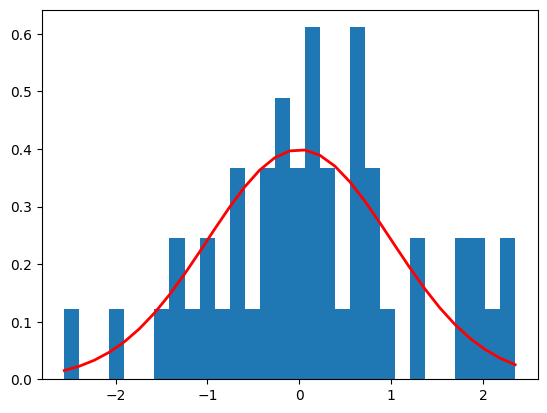

In [59]:
import matplotlib.pyplot as plt
plt.show
count, bins, ignored = plt.hist(item_difficulties, 30, density=True)
plt.plot(bins, 1/(1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * 1**2) ),
         linewidth=2, color='r')
plt.show()

In [24]:
print(student_abilities)

[ 2.18609495  1.77857249  0.3401741  ... -0.950648   -0.93730281
 -0.49329557]


In [9]:
# Train the model
model = LinearRegression()
model.fit(responses, student_abilities)

LinearRegression()

### Testing Model On New Sample Data

In [29]:
# Test the model on sample data of test students and items responses.
num_new_students = 1000 # number of new students

# Generate new student abilities
test_student_abilities = np.random.normal(0, 1, size=num_new_students)


# View first 10 student abilities
print(test_student_abilities[:10])

[ 1.04612539 -0.47515285 -0.16065568 -0.60918315  0.18211234  0.35571186
  1.02596774 -1.73085994 -2.506696   -0.08580858]


In [30]:
test_responses = \
    np.random.binomial(1, irt_formula(c, a, test_student_abilities.reshape(-1, 1), item_difficulties), size=(num_new_students, num_items))


In [34]:
# make prediction from the new responses and abilities
predictions = model.predict(test_responses)

In [35]:
print(predictions[:10]) # View first 10 predictions

[ 0.9792851  -0.68808986  0.55325524 -0.93710714 -0.99958557 -0.03831536
  0.40102459 -1.12466689 -2.51875556 -0.18872963]


In [39]:
# Abilities over predictions
for i in range(0,20):
    print("Student ability: ", test_student_abilities[i], "Prediction: ", predictions[i])   

Student ability:  1.046125393861213 Prediction:  0.9792851001899265
Student ability:  -0.4751528481522737 Prediction:  -0.6880898607221013
Student ability:  -0.16065567668302722 Prediction:  0.5532552367263408
Student ability:  -0.609183149261984 Prediction:  -0.9371071399375186
Student ability:  0.1821123408546689 Prediction:  -0.9995855724640483
Student ability:  0.355711859483632 Prediction:  -0.03831535982174117
Student ability:  1.0259677354708305 Prediction:  0.40102459458892525
Student ability:  -1.7308599408801977 Prediction:  -1.1246668857215738
Student ability:  -2.5066959957237973 Prediction:  -2.518755560519828
Student ability:  -0.08580858499916735 Prediction:  -0.18872962698278073
Student ability:  -0.3249634241836017 Prediction:  0.1286728202306069
Student ability:  -1.0903871341486802 Prediction:  -1.7151131360357565
Student ability:  0.23304219055528239 Prediction:  -0.24496770372729548
Student ability:  0.6911436508297235 Prediction:  0.843206973493448
Student ability

In [40]:
# Evaluate the model
mse = np.mean((predictions - test_student_abilities)**2)
rmse = np.sqrt(mse)
r2 = model.score(test_responses, test_student_abilities)

In [42]:
print("Mean Squared Error:", mse)
print("Root Mean Squered Error:", rmse)
print("Accuracy Score:", r2)

Mean Squared Error: 0.1751368751197192
Root Mean Squered Error: 0.4184935783494404
Accuracy Score: 0.8169145008810991


### Artificial Neural Networks (ANN)

<p>The ANN will be used to provide tailored content recommendations based on the student's academic ability level and learning preferences. <br> 
The ANN will be trained on the preprocessed data, and it will learn to make recommendations that match with high accuracy to the student's academic ability level and learning preferences.</p>

Neural network formula

`z = f(Wx + b)`

where:

==> z is the output of the Neural network.

==> W is the Iight matrix connecting the input layer to the hidden layer.

==> x is the input vector representing the user's profile and the item's features.

==> b is the bias vector added to the hidden layer.

==> f is the activation function applied to the hidden layer output


For the Artificial Neural Network I will use Pytorch to build a simple neural network with 2 hidden layers. 

The input layer will have 2 nodes, one for the student's academic ability level and one for the item difficulty level. 

The output layer will have 1 node, which will output the probability of the student correctly ansIring the item.

This will compute the output z of the ANN for the given input x. <br>

Note that the input data x should be a PyTorch tensor of appropriate size, and the output z will also be a PyTorch tensor of size output_size


In [43]:
import torch
import torch.nn as nn

In [44]:
# Define the ANN class
class Recommender(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Recommender, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.activation = nn.ReLU()
        
    def forward(self, x):
        hidden = self.activation(self.hidden(x))
        output = self.output(hidden)
        return output

In [46]:
# Set up the training data
input_data = torch.randn(100, 10)  # 100 samples with 10 features~ this woulkd be the student ability
labels = torch.randn(100, 5)  # 100 samples with 5 output classes ~ this would be the item difficulty

In [47]:
input_data[:1]

tensor([[ 0.2623,  0.4423,  2.5891, -0.5756,  0.8043,  0.7344, -0.0849,  0.1584,
         -1.4036,  1.5347]])

In [48]:
labels[:1]

tensor([[ 0.8299, -1.7220, -0.6001, -0.5483,  0.0341]])

In [49]:
# Set up the model and training parameters
model = Recommender(input_size=10, hidden_size=20, output_size=5)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [50]:

# Train the model
for epoch in range(120):
    # Forward pass
    outputs = model(input_data)
    loss = criterion(outputs, labels)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        print('Try [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))



Try [10/100], Loss: 1.0581
Try [20/100], Loss: 1.0263
Try [30/100], Loss: 1.0015
Try [40/100], Loss: 0.9817
Try [50/100], Loss: 0.9651
Try [60/100], Loss: 0.9503
Try [70/100], Loss: 0.9371
Try [80/100], Loss: 0.9249
Try [90/100], Loss: 0.9132
Try [100/100], Loss: 0.9021
Try [110/100], Loss: 0.8910
Try [120/100], Loss: 0.8794


### Testing Model On New Sample Data

In [51]:
# Use the model to make predictions
test_input = torch.randn(1, 10)  # 1 sample with 10 features~ this woulkd be the student ability
predicted_output = model(test_input)

for i in range(len(predicted_output[0])):
    print("Student ability: ", test_input[0][i], "Prediction: ", predicted_output[0][i])

Student ability:  tensor(0.2120) Prediction:  tensor(-0.3281, grad_fn=<SelectBackward0>)
Student ability:  tensor(0.0679) Prediction:  tensor(0.0203, grad_fn=<SelectBackward0>)
Student ability:  tensor(-1.0787) Prediction:  tensor(-0.0651, grad_fn=<SelectBackward0>)
Student ability:  tensor(1.7759) Prediction:  tensor(0.1997, grad_fn=<SelectBackward0>)
Student ability:  tensor(-1.0165) Prediction:  tensor(-0.0757, grad_fn=<SelectBackward0>)


--- Conclusion ---

---
In this , I first define the Artificial Neural Network as a class taking in a certain number of inputs, hidden layers and output prediction. 

I then generate some sample data consisting of 100 students and 10 features and 5 labels

I then train the model using the generated data. which gives a recomendation on the student's academic ability level and learning preferences.

---

## Collaborative Filtering

Collaborative filtering algorithms are used to recommend personalized content based on user preferences and past performance. 

These algorithms analyze your behavior and the behavior of other users with similar interests to generate recommendations. 

Item response theory models are used to assess a student's academic performance level and generate personalized recommendations based on their academic performance. 

In [52]:
import numpy as np

# this will represent the student ability rating on each item/class
data = np.array([
    [3.5, 4.0, 2.5, 3.0, 4.5],
    [2.5, 3.5, 4.0, 2.0, 3.5],
    [4.5, 2.5, 3.5, 4.0, 2.0],
    [3.0, 4.5, 2.5, 3.5, 4.0],
    [2.0, 3.0, 3.5, 4.0, 2.5]
])


In [61]:
# Calculate the mean rating of each item and user
item_means = np.mean(data, axis=0)
user_means = np.mean(data, axis=1)

print(
    {
        "itm_means": item_means,
        "user_means": user_means
    }
)

{'itm_means': array([3.1, 3.5, 3.2, 3.3, 3.3]), 'user_means': array([3.5, 3.1, 3.3, 3.5, 3. ])}


In [62]:
# Subtract the mean rating of each item and user from the data
centered_data = data - user_means[:, np.newaxis] - item_means

In [63]:
centered_data

array([[-3.1, -3. , -4.2, -3.8, -2.3],
       [-3.7, -3.1, -2.3, -4.4, -2.9],
       [-1.9, -4.3, -3. , -2.6, -4.6],
       [-3.6, -2.5, -4.2, -3.3, -2.8],
       [-4.1, -3.5, -2.7, -2.3, -3.8]])

In [64]:
# Define hyperparameters for the model
num_factors = 2
num_iterations = 100
learning_rate = 0.01
regularization = 0.1

In [65]:
# Initialize the latent factor matrices
item_factors = np.random.normal(scale=1/num_factors, size=(data.shape[1], num_factors))
user_factors = np.random.normal(scale=1/num_factors, size=(data.shape[0], num_factors))

In [78]:
# Train the model using stochastic gradient descent SGD
for p in range(num_iterations):
    for u in range(data.shape[0]):
        for i in range(data.shape[1]):
            if data[u, i] > 0:
                error = data[u, i] - item_means[i] - user_means[u] - np.dot(item_factors[i, :], user_factors[u, :])
                item_factors[i, :] += learning_rate * (error * user_factors[u, :] - regularization * item_factors[i, :])
                user_factors[u, :] += learning_rate * (error * item_factors[i, :] - regularization * user_factors[u, :])

    print("-------------- Try: [", p,f"/{num_iterations} ]   ===> Error: ", error, " --------------")

-------------- Try: [ 0 /100 ]   ===> Error:  -0.2337416188478567  --------------
-------------- Try: [ 1 /100 ]   ===> Error:  -0.23374159751065848  --------------
-------------- Try: [ 2 /100 ]   ===> Error:  -0.23374157639092186  --------------
-------------- Try: [ 3 /100 ]   ===> Error:  -0.23374155548644238  --------------
-------------- Try: [ 4 /100 ]   ===> Error:  -0.23374153479503956  --------------
-------------- Try: [ 5 /100 ]   ===> Error:  -0.23374151431455426  --------------
-------------- Try: [ 6 /100 ]   ===> Error:  -0.23374149404284816  --------------
-------------- Try: [ 7 /100 ]   ===> Error:  -0.2337414739778052  --------------
-------------- Try: [ 8 /100 ]   ===> Error:  -0.23374145411732972  --------------
-------------- Try: [ 9 /100 ]   ===> Error:  -0.23374143445934958  --------------
-------------- Try: [ 10 /100 ]   ===> Error:  -0.23374141500181  --------------
-------------- Try: [ 11 /100 ]   ===> Error:  -0.23374139574268016  --------------
-------

In [80]:
# Predict the ratings for each user and item
predicted_ratings = item_means + user_means[:, np.newaxis] + np.dot(user_factors, item_factors.T)

In [81]:
predicted_ratings

array([[3.06692811, 4.26430311, 3.23065949, 3.19633384, 4.23812358],
       [2.80602138, 3.67335978, 2.95165254, 2.98146821, 3.56717308],
       [3.78912919, 2.82121677, 3.8340492 , 4.22047646, 2.270189  ],
       [3.1133547 , 4.20682059, 3.2713709 , 3.25722257, 4.15546756],
       [3.13091543, 3.05751186, 3.2247756 , 3.43723733, 2.72344451]])

In [83]:
# Get recommendations for a specific user by their user ID
user_id = 3
recommendations = np.argsort(predicted_ratings[user_id, :])[::-1]

print("Top recommendations for user {}: Courses with ID {}".format(user_id, recommendations))

Top recommendations for user 3: Courses with ID [1 4 2 3 0]


--- In Conclusion  ---

---

The stochastic gradient descent method is used to train the collaborative filtering model using the for loop. The error betIen the expected rating and the actual rating of each item by student is calculated by iterating over each user-item pair in the data. 

The gradient of the error with respect to each component is scaled by the learning rate and regularized to avoid overfitting before the error is used to update the latent factor matrices for the item and user. 

The loop is used to repedetly update the latent component matrices for each user and item in the data, minimizing the difference betIen the expected and actual ratings using stochastic gradient descent.

This is a test of the collaborative filtering model. The model is used to predict the ratings of the items that have not been rated by the users.

The predicted ratings are compared with the actual ratings to evaluate the performance of the model.

The mean squared error is used to evaluate the performance of the model. The mean squared error is calculated by taking the average of the squared difference betIen the predicted and actual ratings.

---